# Importing Dependencies

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

# Getting the data

In [12]:
london = pd.read_csv('London_2014.csv', skipinitialspace=True)

In [14]:
london.head()

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,11,8,6,9,7,4,94,86,73,...,31,11,2,40,26,66.0,9.91,4.0,Rain,186<br />
1,2014-1-2,11,9,6,9,6,4,94,81,60,...,31,15,5,32,21,50.0,1.02,2.0,Rain,214<br />
2,2014-1-3,11,8,6,9,5,2,94,76,54,...,31,12,0,50,29,69.0,7.11,2.0,Rain-Thunderstorm,219<br />
3,2014-1-4,9,6,3,8,6,2,93,85,65,...,31,12,5,35,21,39.0,9.91,4.0,Rain,211<br />
4,2014-1-5,12,7,1,11,4,-1,100,88,77,...,31,14,5,35,16,NaN,0.25,5.0,Rain,199<br />


In [3]:
delhi=pd.read_csv('Delhi_DEL_2014.csv')

In [4]:
delhi.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,-4,-7,-9,-9,-10,-11,82,70,58,...,2,2,2,6,2,NaN,0.0,8.0,NaN,-1<br />
1,2014-1-2,-1,-4,-8,-6,-8,-11,75,69,53,...,3,2,2,6,0,NaN,0.0,8.0,NaN,-1<br />
2,2014-1-3,1,-3,-8,-4,-6,-10,84,72,54,...,3,2,2,6,0,NaN,0.0,8.0,NaN,-1<br />
3,2014-1-4,-1,-2,-3,-4,-5,-6,80,74,64,...,8,4,2,14,2,NaN,0.0,8.0,NaN,-1<br />
4,2014-1-5,-1,-3,-6,-4,-6,-8,93,79,71,...,6,3,2,14,2,NaN,0.0,8.0,Snow,-1<br />


In [6]:
#we'll rename 'WindDirDegrees< br />' to 'WindDirDegrees'.

delhi = delhi.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

In [8]:
#remove the < br /> html line breaks from the values in the 'WindDirDegrees' column.
#and change the values in the 'WindDirDegrees' column to float64:
delhi['WindDirDegrees'] = delhi['WindDirDegrees'].str.rstrip('<br />')
delhi['WindDirDegrees'] = delhi['WindDirDegrees'].astype('float64')   

In [25]:
#We need to change the values in the 'GMT' column into values of the datetime64 date type.
#We also need to change the index from the default to the datetime64 values in the 'GMT' column so that it is easier to pull out rows between particular dates and display more meaningful graphs:
#Importing the date time modules
import datetime
delhi['Date'] = pd.to_datetime(delhi['Date'])
delhi.index = delhi['Date']

# Finding a summer break

According to research, summerin Dehli extends for the whole months of April to August. The average temperature can vary from 25oC to 45oC during the summer. I'm going to create a dataframe that holds just those months using the datetime index, like this:

In [28]:
from datetime import datetime
summer = delhi.loc[datetime(2014,4,1) : datetime(2014,8,31)]

In [29]:
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-20,2014-06-20,36,26,16,12,9,2,56,24,10,...,14,11,10,21,5,NaN,0.0,NaN,NaN,-1.0
2014-06-21,2014-06-21,37,27,17,12,7,0,51,25,5,...,19,14,10,23,6,NaN,0.0,NaN,NaN,167.0
2014-06-22,2014-06-22,37,27,17,9,5,-6,34,21,4,...,14,11,10,23,6,NaN,0.0,1.0,NaN,106.0
2014-06-23,2014-06-23,33,26,18,14,11,4,50,34,16,...,11,10,10,26,8,NaN,0.0,1.0,NaN,31.0
2014-06-24,2014-06-24,31,25,19,13,11,7,56,36,19,...,14,11,10,26,10,NaN,0.0,2.0,Thunderstorm,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-27,2014-08-27,36,28,19,13,11,3,57,31,7,...,14,11,10,18,5,NaN,0.0,1.0,NaN,16.0
2014-08-28,2014-08-28,38,27,16,11,9,5,61,26,10,...,10,10,10,19,5,NaN,0.0,1.0,NaN,6.0
2014-08-29,2014-08-29,38,28,18,12,8,4,43,22,6,...,19,13,10,14,8,NaN,0.0,NaN,NaN,-1.0


<AxesSubplot:xlabel='Date'>

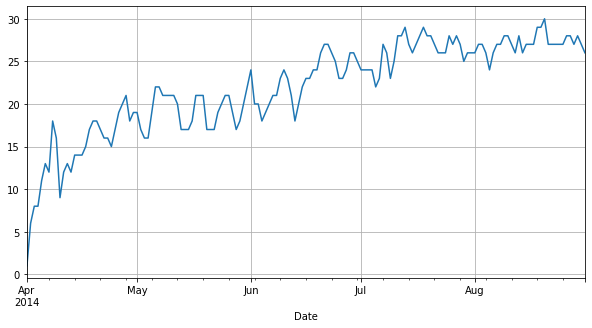

In [30]:
#Plot the 'Mean TemperatureC' for the summer:

summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

<AxesSubplot:xlabel='Date'>

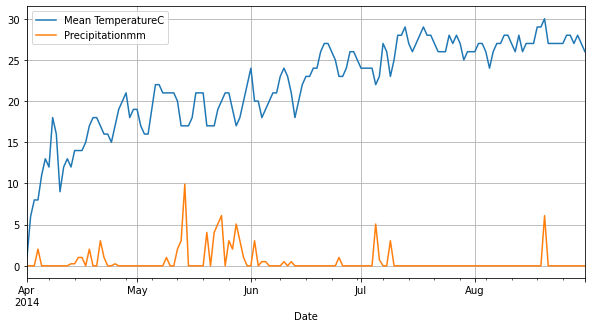

In [31]:
#Let's also put precipitation on the graph too:

summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))


# Conclusion

The above graphs shows the increase in the temperature and reduced percipitation. This depicts that the holiday is going to be really good!!!